In [25]:
from sklearn.neural_network import MLPClassifier
#sklearn 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#to work on the X
#StandardScaler => standardize data (for categorical data)
#OneHotEncoder => creates dummies using categorical variables
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
#train_test_split => 
#KFold => more complex way to split training and test set: fit the model five times and then average the data
#gridsearch cross validation: to search a set of hyperparameters (the model will use some hyperparameters=> alpha on the regularisation part for example=> search through different para and get the best one)
from sklearn.pipeline import Pipeline
#like a box => quite graphical 
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
#metrics
from sklearn.impute import SimpleImputer
from sklearn import metrics 


import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('films2020_2021_2022_visu.csv', encoding='utf-8-sig',sep=";")
df

,Titre,genre1,genre2,réalisateur_1,actor_1,actor_2,actor_3,note_presse,note_spectators,Scenar,...,real_awards,first_actor_awards,second_actor_awards,length_corrected,day,month,year,note_spectator_word,nomi,note_spectators_binary
0,#No_Filter,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,1.6,NaN,...,0.0,0.0,0.0,87,5,mai,2023,bad,0,0
1,13 : La comédie musicale,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,2.6,Robert Horn,...,1.0,0.0,0.0,94,12,août,2022,soso,0,0
2,16 ans,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,3.2,3.6,Philippe Lioret,...,4.0,0.0,0.0,94,4,janvier,2023,good,1,1
3,1UP,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,2.2,Julia Yorks,...,0.0,0.0,0.0,100,15,juillet,2022,soso,0,0
4,365 jours : Au lendemain,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,1.2,Tomasz Mandes,...,0.0,0.0,0.0,106,27,avril,2022,bad,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3279,White Building,Drame,NaN,Kavich Neang,Piseth Chhun,Sithan Hout,Sokha Uk,3.5,2.8,Kavich Neang,...,0.0,0.0,0.0,90,22,décembre,2021,soso,4,0
3280,Who's the Boss,Comédie,Romance,Chinaza Onuzo,Funke Akindele,Blossom Chukwujekwu,Sharon Ooja,NaN,2.9,NaN,...,0.0,0.0,0.0,105,25,octobre,2022,soso,0,0
3281,Why Moths Fly to the Light?,Drame,NaN,Zaur Dzhafarov,Anita Shmatova,Arthur Valente,NaN,NaN,3.0,NaN,...,0.0,0.0,0.0,62,15,mars,2021,soso,0,0
3282,Wildland,Policier,Thriller,Jeanette Nordahl,Sandra Guldberg Kampp,Sidse Babett Knudsen,Joachim Fjelstrup,NaN,1.9,Ingeborg Topsøe,...,0.0,0.0,1.0,88,9,novembre,2021,bad,0,0


In [9]:
df=df.drop(["note_spectator_word","note_spectators"], axis=1)

In [10]:
y=df['note_spectators_binary'] #default y
X=df.drop(columns='note_spectators_binary') #reste des données

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#it will be set to 0.25.for the test size and 75% for train if no value specified

In [12]:
M= ["actor_1","length_corrected","nationality_1","language","genre1","réalisateur_1","first_actor_awards", "nomi","note_presse","real_awards"]

In [13]:
X_train_M=X_train[M]
X_test_M =X_test[M]

In [14]:
#2 dictionaries to keep the performancies
test_accuracy={}
test_auc_roc={}

In [15]:
neural = MLPClassifier(
    hidden_layer_sizes=(10), random_state=0, max_iter=500
)
#I precise lots of the hyperparameters

In [17]:
from sklearn.compose import make_column_selector as selector
#how I will handle the categorical and numerical vraiables
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(X_train_M)
categorical_columns

['actor_1', 'nationality_1', 'language', 'genre1', 'réalisateur_1']

In [18]:
categorical_transformer= Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))]

)

In [19]:
numeric_columns = [col for col in X_train_M.columns if col not in categorical_columns]
numeric_columns

['length_corrected',
 'first_actor_awards',
 'nomi',
 'note_presse',
 'real_awards']

In [20]:
numeric_transformer= Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean', fill_value='missing')), 
        ("scaler", StandardScaler())]
)
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(fill_value='missing')),
                ('scaler', StandardScaler())])

In [21]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_columns),
        ("cat", categorical_transformer, categorical_columns),    
]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing')),
                                                 ('scaler', StandardScaler())]),
                                 ['length_corrected', 'first_actor_awards',
                                  'nomi', 'note_presse', 'real_awards']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['actor_1', 'nationality_1', 'language',
                                  'genre1', 'réalisateur_1'])])

In [22]:
#Append classifier to preprocessing pipeline. Now we have a full prediction pipeline.
neural_M = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", neural)]
)
neural_M

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['length_corrected',
                                                   'first_actor_awards', 'nomi',
                                                   'note_presse',
                                                   'real_awards']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                      

In [23]:
neural_net = neural_M.fit(X_train_M, y_train)

In [26]:
y_pred = neural_net.predict(X_test_M)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()

In [27]:
specificity = true_neg / (true_neg + false_pos)
print("Specificity:", specificity)
sensitivity = true_pos / (true_pos + false_neg)
print("Sensitivity:", sensitivity)

Specificity: 0.7618147448015122
Sensitivity: 0.5856164383561644


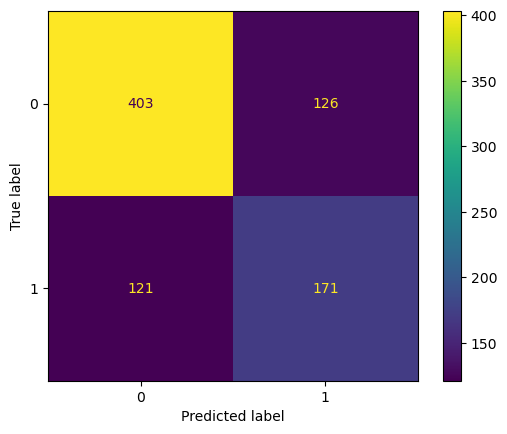

In [28]:
norm_conf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig = metrics.ConfusionMatrixDisplay(norm_conf_matrix)#/X_test.shape[0] would add this in brackets to have in %
fig.plot() #  Creates the figure
plt.show() #  Displays the figure


In [29]:
y_test_hat_probs = neural_net.predict_proba(X_test_M)[:,1]

test_accuracy['neural'] = accuracy_score(y_test, y_pred)*100
test_auc_roc['neural'] = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Testing AUC: %.4f %%' % test_auc_roc['neural'])
print('Testing accuracy: %.4f %%' % test_accuracy['neural']) 

Confusion matrix:
 [[403 126]
 [121 171]]
Testing AUC: 70.9047 %
Testing accuracy: 69.9147 %
